# e.g. 20: probability

http://www.usablestats.com/lessons/zarea

https://www.dataquest.io/blog/basic-statistics-in-python-probability/

https://www.mariokrapp.com/blog/tag/python/index.html

http://earthpy.org/pandas-basics.html

https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

https://www.youtube.com/watch?v=Iq9DzN6mvYA #great video on empirical stats approaches.

https://www.youtube.com/watch?v=TGGGDpb04Yc

# last edited 25 September 2018

In [10]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [11]:
print('BEGIN')

%matplotlib inline

__file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

import numpy as np
import numpy.ma as ma
import inspect
import pickle
import bz2
import glob
import socket
import re
import os
import scipy.stats as st
import matplotlib.pyplot as plt
import math
from scipy import stats
import pandas as pd
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, FixedLocator

CRED = '\033[91m'
CEND = '\033[0m'

hostname=socket.gethostname()

print('hostname=',hostname)

if(re.match('raijin',hostname)):
  print('this is rajin')
  rundir='/short/v14/mac599/cafepp/rundir'
  topdir=''
elif(re.match('oa-3.-cdc',hostname)):
  print('this is vm32')
  rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
  topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'

os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

from n_data_funcs import n_data_funcs

from decadal_diag import \
  box_indices, \
  diag_isothetaoNc, \
  calc_isoN, \
  shade_2d_latlon, \
  shade_2d_simple, \
  smooth, \
  plot_xy, \
  plot_box_indices, \
  nino_indices, \
  plot_2d_scatter, \
  lagcorr, \
  file_sort_ripf, \
  file_spec_summary, \
  basic_stats

model='CAFE'

print('END')

BEGIN
hostname= oa-32-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
END


In [12]:
print('BEGIN')

model='CAFE'
quantity_index_k=0

cafe_experiment_titles = {4:'v0_forecast', 1:'v1_forecast', 3:'v2_forecast', 9:'v1', \
5:'v2', 6:'v3', 7:'aug17p', 2:'v1_assim', 10:'etkf', 11:'nov17n', 12:'jul18b', 13:'v0'}

AnnOut=False
#AnnOut=True

ZeroClim=False
ZeroClim=True

#===============================================================================

ivar_str_cafe='tas';long_name='Air Temperature at 2m';short_name='air2m';units='degC';table='day'
ivar_str_cafe='pr';long_name='Surface precipitation';short_name='precip';units='mm/day';table='day'

pval_v1forc=1 #v1_forecast
cafe_daily_files_v1forc,cafe_daily_files_flat_v1forc=[],[]
for ensemble in range(2,11+1):
  cafe_inner_daily_files_v1forc=[]
  idir_v1forc=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval_v1forc)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
  daily_ifils_v1forc=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval_v1forc)+'f1_gn_20160101-20211231.nc']
  for file in daily_ifils_v1forc:
    if(not os.path.exists(idir_v1forc+'/'+file)):
      raise SystemExit(idir_v1forc+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
    else:
      cafe_inner_daily_files_v1forc.append(idir_v1forc+'/'+file)
  cafe_daily_files_v1forc.append(cafe_inner_daily_files_v1forc)

cafe_daily_files_v1forc_tmp=file_sort_ripf([input_file[0] for input_file in cafe_daily_files_v1forc],False)
cafe_daily_files_v1forc=[] #need to put into ensemble list form [[,,],[,,],[,,]]
for input_file in cafe_daily_files_v1forc_tmp:
  cafe_daily_files_v1forc.append([input_file])
    
#print('cafe_daily_files_v1forc=',cafe_daily_files_v1forc)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#datetime_all,datetime_uniq,ripf_all,ripf_uniq = file_spec_summary([input_file[0] for input_file in cafe_daily_files_v1forc], True)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

cafe_idir_assim='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p2f1/day/'+ivar_str_cafe+'/gn/v20171025'

cafe_daily_files_assim = sorted(glob.glob(cafe_idir_assim+'/'+ivar_str_cafe+'_day_historical_CAFE-1-0_r1i1p2f1_gn_200?????-????????.nc') + \
                         glob.glob(cafe_idir_assim+'/'+ivar_str_cafe+'_day_historical_CAFE-1-0_r1i1p2f1_gn_201[0,1,2,3,4,5]????-????????.nc'))

cafe_daily_files_assim = [file_sort_ripf(cafe_daily_files_assim, False)]

#print('cafe_daily_files_assim=',cafe_daily_files_assim)

#datetime_all,datetime_uniq,ripf_all,ripf_uniq = file_spec_summary(*cafe_daily_files_assim, True)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

cafe_daily_files_v1forc = n_data_funcs(input_files=cafe_daily_files_v1forc, input_var_name=ivar_str_cafe)

cafe_daily_files_v1forc.calculate_filedatetime_info(calendar='julian')

cafe_daily_files_v1forc.get_latlon_info(Diag=False)

cafe_quantity_daily_v1forc = cafe_daily_files_v1forc.calculate_quantity('dummy', quantity='latlon_region')

cafe_daily_files_v1forc.daily_monthly_indices_info(timesep=1)

cafe_monthly_quantity_from_daily_v1forc = cafe_daily_files_v1forc.daily_to_monthly(EndOption=1, input=cafe_quantity_daily_v1forc)

cafe_quantity_monthlyclimatology_from_daily_v1forc, cafe_quantity_monthly_from_daily_v1forc = cafe_daily_files_v1forc.monthly_clim_anom( \
  Diag=False, input=cafe_monthly_quantity_from_daily_v1forc, AnnOut=AnnOut, ZeroClim=ZeroClim)

print('cafe_quantity_monthly_from_daily_v1forc.shape=',cafe_quantity_monthly_from_daily_v1forc.shape)

#===============================================================================

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

cafe_daily_files_assim = n_data_funcs(input_files=cafe_daily_files_assim, input_var_name=ivar_str_cafe)

cafe_daily_files_assim.calculate_filedatetime_info(calendar='julian')

cafe_daily_files_assim.get_latlon_info(Diag=False)

cafe_quantity_daily_assim = cafe_daily_files_assim.calculate_quantity('dummy', quantity='latlon_region')

cafe_daily_files_assim.daily_monthly_indices_info(timesep=1)

cafe_monthly_quantity_from_daily_assim=cafe_daily_files_assim.daily_to_monthly(EndOption=1, input=cafe_quantity_daily_assim)

cafe_quantity_monthlyclimatology_from_daily_assim, cafe_quantity_monthly_from_daily_assim = cafe_daily_files_assim.monthly_clim_anom( \
  Diag=False, input=cafe_monthly_quantity_from_daily_assim, AnnOut=AnnOut, ZeroClim=ZeroClim)

print('cafe_quantity_monthly_from_daily_assim.shape=',cafe_quantity_monthly_from_daily_assim.shape)


#===============================================================================

print('END')

BEGIN
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
calculate_quantity: value_split= ['latlon_region']
n_data_funcs.calculate_quantity: Using whole lat/lon region or that specified in instance.


/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


daily_to_monthly: Discarding beg&/end month if they exist.
daily_to_monthly: type#4
Diag= False
monthly_clim_anom: All years have 12 months.
cafe_quantity_monthly_from_daily_v1forc.shape= (72, 10, 90, 144)
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 2: no ensembles, multiple input files.
calculate_quantity: value_split= ['latlon_region']
n_data_funcs.calculate_quantity: Using whole lat/lon region or that specified in instance.
daily_to_monthly: Discarding beg&/end month if they exist.
daily_to_monthly: type#4
Diag= False
monthly_clim_anom: All years have 12 months.
cafe_quantity_monthly_from_daily_assim.shape= (168, 90, 144)
END


BEGIN
v1forc_time_series2d.shape= (720, 90, 144)


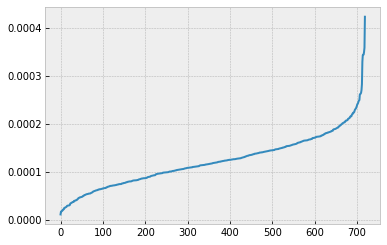

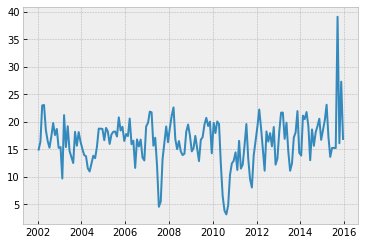

assim_time_series_raw2d.shape= (168, 90, 144)


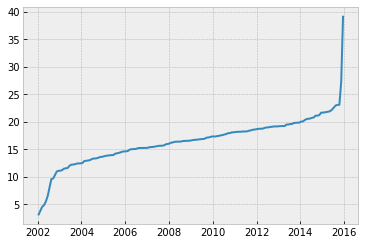

assim_time_series2d.shape= (168, 90, 144)
assim_p902d.shape= (90, 144)
assim_p502dX.shape= (1, 90, 144)
assim_p502dY.shape= (168, 90, 144)
assim_p902dX.shape= (1, 90, 144)
assim_p902dY.shape= (168, 90, 144)
assim_index_p502d.shape= (90, 144)
assim_cum_dist2dY.shape= (168, 90, 144)
Basic statistics using unweighted data:
min  0.017964071856287345
max  0.6467065868263473
avg  0.4055615620610631
Total Points  12960
No. Good  12960
No. Bad  0
STD  0.08273837761063862


/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


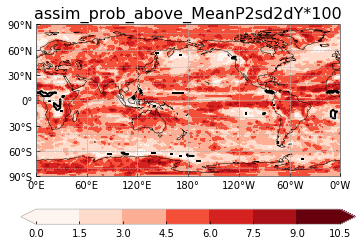

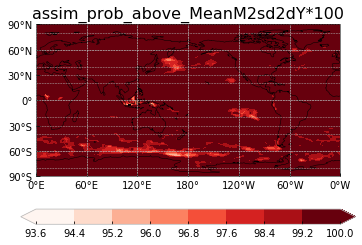

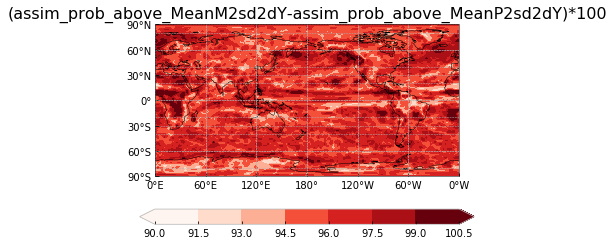

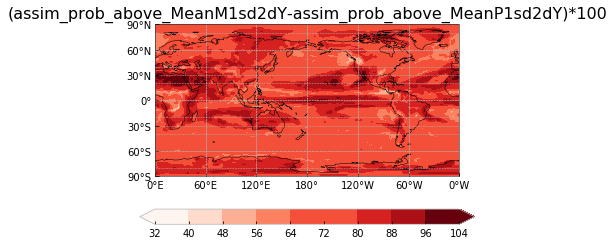

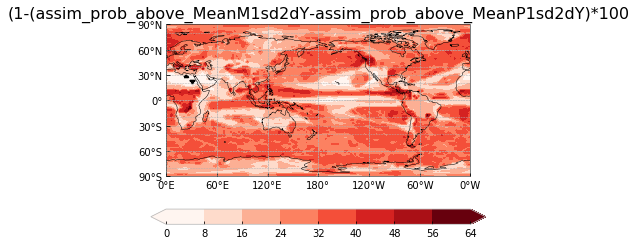

END


In [9]:
print('BEGIN')

'''
create 2D version from scalar (single point) one.
'''

clevs=None

plt.style.use('bmh')

if(ZeroClim):
  if(ivar_str_cafe=='tas'):
    OffSet=273.15
    Scale=1.0
  else: #pr currently
    OffSet=0.0
    Scale=86400.0
else:
  OffSet=0.0
  Scale=1.0
  
v1forc_time_series2d = np.sort(np.reshape(cafe_quantity_monthly_from_daily_v1forc, (720,90,144)), axis=0)

print('v1forc_time_series2d.shape=',v1forc_time_series2d.shape)

v1forc_cum_dist = np.linspace(0.,1.,len(v1forc_time_series2d))

v1forc_exceedence_probability = 1 - v1forc_cum_dist

plt.plot(v1forc_time_series2d[:,45,45])
plt.show()

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

assim_time_series_raw2d = cafe_quantity_monthly_from_daily_assim[:]*Scale - OffSet

plt.plot(cafe_daily_files_assim.year_fraction_anomaly, assim_time_series_raw2d[:,45,45])
plt.show()

print('assim_time_series_raw2d.shape=',assim_time_series_raw2d.shape)

assim_time_series2d = np.sort(assim_time_series_raw2d, axis=0)

plt.plot(cafe_daily_files_assim.year_fraction_anomaly, assim_time_series2d[:,45,45])
plt.show()

print('assim_time_series2d.shape=',assim_time_series2d.shape)

assim_p502d = np.percentile(assim_time_series2d, 50., axis=0, interpolation='linear')

assim_p902d = np.percentile(assim_time_series2d, 90., axis=0, interpolation='linear')

assim_Mean2d = np.average(assim_time_series2d, axis=0)
assim_Mean2dX = np.expand_dims(assim_Mean2d,0)
assim_Mean2dY = np.tile(assim_Mean2dX, (len(cafe_daily_files_assim.year_fraction_anomaly),1,1))

assim_MeanP1sd2d = np.average(assim_time_series2d, axis=0) + np.std(assim_time_series2d, axis=0)
assim_MeanP1sd2dX = np.expand_dims(assim_MeanP1sd2d,0)
assim_MeanP1sd2dY = np.tile(assim_MeanP1sd2dX, (len(cafe_daily_files_assim.year_fraction_anomaly),1,1))

assim_MeanP2sd2d = np.average(assim_time_series2d, axis=0) + np.std(assim_time_series2d, axis=0)*2
assim_MeanP2sd2dX = np.expand_dims(assim_MeanP2sd2d,0)
assim_MeanP2sd2dY = np.tile(assim_MeanP2sd2dX, (len(cafe_daily_files_assim.year_fraction_anomaly),1,1))

assim_MeanM1sd2d = np.average(assim_time_series2d, axis=0) - np.std(assim_time_series2d, axis=0)
assim_MeanM1sd2dX = np.expand_dims(assim_MeanM1sd2d,0)
assim_MeanM1sd2dY = np.tile(assim_MeanM1sd2dX, (len(cafe_daily_files_assim.year_fraction_anomaly),1,1))

assim_MeanM2sd2d = np.average(assim_time_series2d, axis=0) - np.std(assim_time_series2d, axis=0)*2
assim_MeanM2sd2dX = np.expand_dims(assim_MeanM2sd2d,0)
assim_MeanM2sd2dY = np.tile(assim_MeanM2sd2dX, (len(cafe_daily_files_assim.year_fraction_anomaly),1,1))

print('assim_p902d.shape=',assim_p902d.shape)

assim_p502dX = np.expand_dims(assim_p502d,0)

print('assim_p502dX.shape=',assim_p502dX.shape)

assim_p502dY = np.tile(assim_p502dX, (len(cafe_daily_files_assim.year_fraction_anomaly),1,1))

print('assim_p502dY.shape=',assim_p502dY.shape)

assim_p902dX = np.expand_dims(assim_p902d,0)

print('assim_p902dX.shape=',assim_p902dX.shape)

assim_p902dY = np.tile(assim_p902dX, (len(cafe_daily_files_assim.year_fraction_anomaly),1,1))

print('assim_p902dY.shape=',assim_p902dY.shape)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

assim_index_p502d=np.argmin(np.abs(assim_time_series2d-assim_p502dY), axis=0) #on sorted data.
assim_index_p902d=np.argmin(np.abs(assim_time_series2d-assim_p902dY), axis=0) #on sorted data.
assim_index_Mean2d=np.argmin(np.abs(assim_time_series2d-assim_Mean2dY), axis=0) #on sorted data.
assim_index_MeanP1sd2dY=np.argmin(np.abs(assim_time_series2d-assim_MeanP1sd2dY), axis=0) #on sorted data.
assim_index_MeanP2sd2dY=np.argmin(np.abs(assim_time_series2d-assim_MeanP2sd2dY), axis=0) #on sorted data.
assim_index_MeanM1sd2dY=np.argmin(np.abs(assim_time_series2d-assim_MeanM1sd2dY), axis=0) #on sorted data.
assim_index_MeanM2sd2dY=np.argmin(np.abs(assim_time_series2d-assim_MeanM2sd2dY), axis=0) #on sorted data.

print('assim_index_p502d.shape=',assim_index_p502d.shape)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

assim_cum_dist = np.linspace(0.,1.,len(assim_time_series2d))

assim_cum_dist2dX = np.expand_dims(np.expand_dims(assim_cum_dist,1),1)

assim_cum_dist2dY = np.tile(assim_cum_dist2dX, (1,cafe_daily_files_assim.nlat,cafe_daily_files_assim.nlon))

print('assim_cum_dist2dY.shape=',assim_cum_dist2dY.shape)

# exceedence_probability2d = np.zeros((cafe_daily_files_assim.nlat,cafe_daily_files_assim.nlon), dtype=float)
# for j in range(cafe_daily_files_assim.nlat):
#   for i in range(cafe_daily_files_assim.nlon):
#     exceedence_probability2d[j,i] = 1. - cum_dist

assim_exceedence_probability = 1 - assim_cum_dist

#print('exceedence_probability=',exceedence_probability)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#exceedence_probability2d = 1. - cum_dist2dY

#print('exceedence_probability2d.shape=',exceedence_probability2d.shape)

#print('index_p902d.shape=',index_p902d.shape)

#print('probability of exceeding median=',exceedence_probability2d[index_p502d,])

#print('index_p502d=',index_p502d)

assim_prob_above_p50 = ma.zeros((cafe_daily_files_assim.nlat, cafe_daily_files_assim.nlon), dtype=float)
for j in range(cafe_daily_files_assim.nlat):
  for i in range(cafe_daily_files_assim.nlon):
    assim_prob_above_p50[j,i] = assim_exceedence_probability[assim_index_p502d[j,i]]

assim_prob_above_p90 = ma.zeros((cafe_daily_files_assim.nlat, cafe_daily_files_assim.nlon), dtype=float)
for j in range(cafe_daily_files_assim.nlat):
  for i in range(cafe_daily_files_assim.nlon):
    assim_prob_above_p90[j,i] = assim_exceedence_probability[assim_index_p902d[j,i]]

assim_prob_above_Mean = ma.zeros((cafe_daily_files_assim.nlat, cafe_daily_files_assim.nlon), dtype=float)
for j in range(cafe_daily_files_assim.nlat):
  for i in range(cafe_daily_files_assim.nlon):
    assim_prob_above_Mean[j,i] = assim_exceedence_probability[assim_index_Mean2d[j,i]]
   
assim_prob_above_MeanP1sd2dY = ma.zeros((cafe_daily_files_assim.nlat, cafe_daily_files_assim.nlon), dtype=float)
for j in range(cafe_daily_files_assim.nlat):
  for i in range(cafe_daily_files_assim.nlon):
    assim_prob_above_MeanP1sd2dY[j,i] = assim_exceedence_probability[assim_index_MeanP1sd2dY[j,i]]
  
assim_prob_above_MeanP2sd2dY = ma.zeros((cafe_daily_files_assim.nlat, cafe_daily_files_assim.nlon), dtype=float)
for j in range(cafe_daily_files_assim.nlat):
  for i in range(cafe_daily_files_assim.nlon):
    assim_prob_above_MeanP2sd2dY[j,i] = assim_exceedence_probability[assim_index_MeanP2sd2dY[j,i]]

assim_prob_above_MeanM1sd2dY = ma.zeros((cafe_daily_files_assim.nlat, cafe_daily_files_assim.nlon), dtype=float)
for j in range(cafe_daily_files_assim.nlat):
  for i in range(cafe_daily_files_assim.nlon):
    assim_prob_above_MeanM1sd2dY[j,i] = assim_exceedence_probability[assim_index_MeanM1sd2dY[j,i]]
  
assim_prob_above_MeanM2sd2dY = ma.zeros((cafe_daily_files_assim.nlat, cafe_daily_files_assim.nlon), dtype=float)
for j in range(cafe_daily_files_assim.nlat):
  for i in range(cafe_daily_files_assim.nlon):
    assim_prob_above_MeanM2sd2dY[j,i] = assim_exceedence_probability[assim_index_MeanM2sd2dY[j,i]]
    
#basic_stats(assim_prob_above_p50)
#basic_stats(assim_prob_above_p90)
basic_stats(assim_prob_above_Mean)

# shade_2d_latlon( \
#   assim_index_p502d, \
#   xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
#   clevs=clevs, \
#   title='assim_index_p502d', \
#   units=None, \
#   n_contour=[0], \
#   cmap=plt.cm.get_cmap('Reds', 8) \
#   )

# #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

# shade_2d_latlon( \
#   assim_time_series2d[0,], \
#   xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
#   clevs=clevs, \
#   title='assim_time_series2d[0,]', \
#   units=None, \
#   n_contour=[0], \
#   cmap=plt.cm.get_cmap('Reds', 8) \
#   )

# shade_2d_latlon( \
#   assim_p502d, \
#   xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
#   clevs=clevs, \
#   title='assim_p502d', \
#   units=None, \
#   n_contour=[0], \
#   cmap=plt.cm.get_cmap('Reds', 8) \
#   )

# shade_2d_latlon( \
#   assim_p902d, \
#   xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
#   clevs=clevs, \
#   title='assim_p902d', \
#   units=None, \
#   n_contour=[0], \
#   cmap=plt.cm.get_cmap('Reds', 8) \
#   )

# shade_2d_latlon( \
#   assim_p902d-assim_p502d, \
#   xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
#   clevs=clevs, \
#   title='assim_p902d-assim_p502d', \
#   units=None, \
#   n_contour=[0], \
#   cmap=plt.cm.get_cmap('Reds', 8) \
#   )

shade_2d_latlon( \
  assim_prob_above_MeanP2sd2dY*100, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='assim_prob_above_MeanP2sd2dY*100', \
  units=None, \
  n_contour=[0], \
  cmap=plt.cm.get_cmap('Reds', 8) \
  )

# shade_2d_latlon( \
#   assim_prob_above_MeanP1sd2dY*100, \
#   xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
#   clevs=clevs, \
#   title='assim_prob_above_MeanP1sd2dY*100', \
#   units=None, \
#   n_contour=[0], \
#   cmap=plt.cm.get_cmap('Reds', 8) \
#   )

# shade_2d_latlon( \
#   assim_prob_above_MeanM1sd2dY*100, \
#   xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
#   clevs=clevs, \
#   title='assim_prob_above_MeanM1sd2dY*100', \
#   units=None, \
#   n_contour=[0], \
#   cmap=plt.cm.get_cmap('Reds', 8) \
#   )

shade_2d_latlon( \
  assim_prob_above_MeanM2sd2dY*100, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='assim_prob_above_MeanM2sd2dY*100', \
  units=None, \
  n_contour=[0], \
  cmap=plt.cm.get_cmap('Reds', 8) \
  )

shade_2d_latlon( \
  (assim_prob_above_MeanM2sd2dY-assim_prob_above_MeanP2sd2dY)*100, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='(assim_prob_above_MeanM2sd2dY-assim_prob_above_MeanP2sd2dY)*100', \
  units=None, \
  n_contour=[0], \
  cmap=plt.cm.get_cmap('Reds', 8) \
  )

shade_2d_latlon( \
  (assim_prob_above_MeanM1sd2dY-assim_prob_above_MeanP1sd2dY)*100, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='(assim_prob_above_MeanM1sd2dY-assim_prob_above_MeanP1sd2dY)*100', \
  units=None, \
  n_contour=[0], \
  cmap=plt.cm.get_cmap('Reds', 8) \
  )

shade_2d_latlon( \
  (1-(assim_prob_above_MeanM1sd2dY-assim_prob_above_MeanP1sd2dY))*100, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='(1-(assim_prob_above_MeanM1sd2dY-assim_prob_above_MeanP1sd2dY)*100', \
  units=None, \
  n_contour=[0], \
  cmap=plt.cm.get_cmap('Reds', 8) \
  )

print('END')

In [ ]:
### print('BEGIN')

'''
converted
https://blog.mariokrapp.com/Exceedance_probability_curves.html
from pandas dataframe approach to numpy.
Also, using standard matplotlib plot but seting x-axis to be log in panel 3.
'''

if(ZeroClim):
  if(ivar_str_cafe=='tas'):
    OffSet=273.15
    Scale=1.0
  else: #pr currently
    OffSet=0.0
    Scale=86400.0
else:
  OffSet=0.0
  Scale=1.0
  
plt.style.use('bmh')

time_series_raw = cafe_quantity_monthly_from_daily_assim[:,45,0]*Scale - OffSet

time_series = np.sort(time_series_raw)

p50 = np.percentile(time_series, 50., axis=0)
p90 = np.percentile(time_series, 90., axis=0)

print('p50=',p50)

index_p50=np.argmin(np.abs(time_series-p50))
index_p90=np.argmin(np.abs(time_series-p90))

print('index_p50=',index_p50)

X = np.linspace(0.,max(time_series)*1.1,100.)

shape, loc, scale = stats.lognorm.fit(time_series)

cum_dist = np.linspace(0.,1.,len(time_series))

ser_cdf = pd.Series(cum_dist, index=time_series)

# print('ser_cdf=',ser_cdf)

# print('ser_cdf.shape=',ser_cdf.shape)

# print('type(ser_cdf)=',type(ser_cdf))

time_series_cdf = np.zeros((2,len(time_series)),dtype=float)

time_series_cdf[0,:] = time_series
time_series_cdf[1,:] = cum_dist

# for time_cnt in range(len(time_series)):
#   print(time_cnt,time_series_cdf[0,time_cnt],time_series_cdf[1,time_cnt])
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

# print('time_series_cdf=',time_series_cdf)

exceedence_probability = 1. - cum_dist

print('probability of exceeding median=',exceedence_probability[index_p50])
print('probability of exceeding 90th percentile=',exceedence_probability[index_p90])

#print('exceedence_probability=',exceedence_probability)

#ep = 1. - ser_cdf

#print('ep=',ep)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

fig = plt.figure(figsize=(11,8))

ax1 = plt.subplot(221)
plt.plot(time_series, cum_dist, drawstyle='steps', label='data')
plt.plot(X, stats.lognorm.cdf(X, shape, loc, scale),label='lognormal')
ax1.set_xlabel(long_name)
ax1.set_ylabel('CDF')
#ax1.set_xlim(22,32)
ax1.legend(loc=0, framealpha=0.5, fontsize=12)

ax2 = plt.subplot(223)
ax2.hist(time_series, bins=21, normed=True, label='data')
ax2.plot(X, stats.lognorm.pdf(X, shape, loc, scale), label='lognormal')
ax2.set_ylabel('Probability Density')
ax2.set_xlabel(long_name)
#ax2.set_xlim(22,32)
ax2.legend(loc=0, framealpha=0.5, fontsize=12)

A = np.vstack([exceedence_probability, np.ones(len(exceedence_probability))]).T
[m, c], resid = np.linalg.lstsq(A, time_series)[:2]
print('m, c, resid=',m,c,resid)
r2 = 1 - resid / (len(time_series) * np.var(time_series))
print('r2=',r2)

ax3 = plt.subplot(222)
ax3.plot(100.*exceedence_probability, time_series, ls='', marker='o', label='data') #could use ax3.semilogx()
ax3.set_xscale('symlog')
ax3.plot(100.*(1.-stats.lognorm.cdf(X, shape, loc, scale)), X, label='lognormal')
minorLocator = FixedLocator([1,2,5,10,20,50,100])
ax3.xaxis.set_major_locator(minorLocator)
ax3.xaxis.set_major_formatter(ScalarFormatter())
ax3.xaxis.set_major_formatter(FormatStrFormatter("%d"))
ax3.set_xlim(1,100)
#ax3.set_ylim(22,32)
ax3.set_xlabel('Exceedance Probability (%)')
ax3.set_ylabel(long_name)
ax3.invert_xaxis()
ax3.legend(loc=0, framealpha=0.5, fontsize=12)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

ax4 = plt.subplot(224)
ax4.plot(cafe_daily_files_assim.year_fraction_anomaly, time_series_raw)
ax4.set_xlabel('time')
ax4.set_ylabel(long_name)
#ax4.set_ylim(22,32)
plt.suptitle('CAFE', y=1.01, fontsize=14)

plt.tight_layout()
plt.show() 

#fig.savefig('exceedance_curve_cafe.png', transparent=True, dpi=150, bbox_inches='tight')

print('END')

In [ ]:
print('BEGIN')

'''
https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html

'''

import math

assim_Mean = np.average(cafe_quantity_monthly_from_daily_assim, axis=0)
assim_Std = np.std(cafe_quantity_monthly_from_daily_assim, axis=0)
assim_BotTercile = np.percentile(cafe_quantity_monthly_from_daily_assim, 100./3., axis=0)
assim_TopTercile = np.percentile(cafe_quantity_monthly_from_daily_assim, 200./3., axis=0)
assim_Median = np.percentile(cafe_quantity_monthly_from_daily_assim, 50., axis=0)
assim_BotDecile = np.percentile(cafe_quantity_monthly_from_daily_assim, 10., axis=0)
assim_TopDecile = np.percentile(cafe_quantity_monthly_from_daily_assim, 90., axis=0)

# print(assim_mean.shape)
# print(assim_Std.shape)

# v1forc_EnsMean = np.average(cafe_quantity_monthly_from_daily_v1forc, axis=1)
# v1forc_EnsMedian = np.percentile(cafe_quantity_monthly_from_daily_v1forc, 50.0, axis=1)
# v1forc_EnsStd = np.std(cafe_quantity_monthly_from_daily_v1forc, axis=1)
# v1forc_TotMean = np.average(v1forc_Mean, axis=0)

# v1forc_Std = np.std(np.average(cafe_quantity_monthly_from_daily_v1forc, axis=1), axis=0)
# v1forc_BotTercile = np.percentile(np.average(cafe_quantity_monthly_from_daily_v1forc, axis=1), 100./3., axis=0, interpolation='linear')
# v1forc_TopTercile = np.percentile(np.average(cafe_quantity_monthly_from_daily_v1forc, axis=1), 200./3., axis=0, interpolation='linear')
# v1forc_Median = np.percentile(np.average(cafe_quantity_monthly_from_daily_v1forc, axis=1), 50., axis=0, interpolation='linear')
# v1forc_BotDecile = np.percentile(np.average(cafe_quantity_monthly_from_daily_v1forc, axis=1), 10., axis=0, interpolation='linear')

v1forc_TopDecile = np.percentile(cafe_quantity_monthly_from_daily_v1forc, 90., axis=1, interpolation='linear')
v1forc_Mean = np.average(cafe_quantity_monthly_from_daily_v1forc, axis=1)

# print(v1forc_EnsMean.shape)
# print(v1forc_Std.shape)
#print(v1forc_TopDecile.shape)
# v1forc_z_Mean = (v1forc_TotMean - assim_Mean) / assim_Std
# v1forc_z_BotTercile = (v1forc_BotTercile - assim_Mean ) / assim_Std
# v1forc_z_TopTercile = (v1forc_TopTercile - assim_Mean) / assim_Std
# v1forc_z_BotDecile = (v1forc_BotDecile - assim_Mean ) / assim_Std
#v1forc_z_TopDecile = (v1forc_TopDecile[5,] - assim_Mean) / assim_Std
#print(v1forc_z_TopDecile.shape)
# below_Mean = st.norm.cdf(v1forc_z_Mean) * 100.
# above_Mean = (1 - st.norm.cdf(v1forc_z_Mean)) * 100.
# below_BotTercile = st.norm.cdf(v1forc_z_BotTercile) * 100.
# above_TopTercile = (1 - st.norm.cdf(v1forc_z_TopTercile))  * 100.
# below_BotDecile = st.norm.cdf(v1forc_z_BotDecile)  * 100.
# v1forc_error = assim_Std / math.sqrt(10) #consider assim is the population, v1forc is the sample to be tested.
# #mean
# v1forc_z2016 = (v1forc_TopTercile[0,] - assim_Mean) / v1forc_error
# v1forc_z2021 = (v1forc_TopTercile[5,] - assim_Mean) / v1forc_error
#2016-2021 = 6 years.

standard_error = assim_Std / math.sqrt(10)
z = (v1forc_TopDecile[0,] - assim_Mean) / standard_error
above_TopDecile = (1 - st.norm.cdf(z))  * 100.

above = (1 - st.norm.cdf(z))  * 100.

print('above.shape=',above.shape)

clevs=[10.,20.,30.,40.,50.,60.,70.,80.,90.]

shade_2d_latlon( \
  above, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='above', \
  units=None, \
  n_contour=[0], \
  cmap=plt.cm.get_cmap('Reds', 8) \
  )

clevs=None

shade_2d_latlon( \
  v1forc_TopDecile[0,], \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='v1forc_TopDecile[0,]', \
  units=None, \
  n_contour=[0], \
  cmap=plt.cm.get_cmap('Reds', 8) \
  )

shade_2d_latlon( \
  assim_Mean, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='assim_Mean', \
  units=None, \
  n_contour=[0], \
  cmap=plt.cm.get_cmap('Reds', 8) \
  )

step=2;clevs=sorted(list(set(np.arange(-6, 6+step, step).tolist())))

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

shade_2d_latlon( \
  v1forc_TopDecile[0,] - assim_Mean, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='test', \
  units=None, \
  n_contour=[0], \
  cmap=plt.cm.get_cmap('Reds', 8), \
  hatching=(above, [None,'...'], [0.,90.,100.]), \
  xysize=(10,20) \
  )

raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#median
v1forc_z2016 = (v1forc_EnsMedian[0,] - assim_Mean) / v1forc_error
v1forc_z2021 = (v1forc_EnsMedian[5,] - assim_Mean) / v1forc_error

#greater than mean/median.
v1forc_prob2016 = (1 - st.norm.cdf(v1forc_z2016)) * 100.
v1forc_prob2021 = (1 - st.norm.cdf(v1forc_z2021)) * 100.

clevs=[10.,20.,30.,40.,50.,60.,70.,80.,90.]

shade_2d_latlon( \
  v1forc_prob2016, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='v1forc_prob2016', \
  units=None, \
  n_contour=[0], \
  cmap=plt.cm.get_cmap('Reds', 8) \
  )

shade_2d_latlon( \
  v1forc_prob2021, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='v1forc_prob2021', \
  units=None, \
  n_contour=[0], \
  cmap=plt.cm.get_cmap('Reds', 8) \
  )

raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#print(above_mean, above_bot33perc, above_top33perc)

shade_2d_latlon( \
  assim_Mean, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='Mean', \
  units=None, \
#   n_contour=[.95], \
  cmap=plt.cm.get_cmap('Reds', 8) \
  )

shade_2d_latlon( \
  assim_Median, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='Median', \
  units=None, \
#   n_contour=[.95], \
  cmap=plt.cm.get_cmap('Reds', 8) \
  )

clevs=[-2,-1,0,1,2]
step=.5;clevs=sorted(list(set(np.arange(-2, 2+step, step).tolist())))
clevs=None

shade_2d_latlon( \
  assim_Mean-assim_Median, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='Mean-Median', \
  units=None, \
  n_contour=[0], \
  cmap=plt.cm.get_cmap('Reds', 8) \
  )

raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

clevs=[10.,20.,30.,40.,50.,60.,70.,80.,90.]

shade_2d_latlon( \
  below_Mean, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='Probability of below normal', \
  units=None, \
#   n_contour=[.95], \
  cmap=plt.cm.get_cmap('Reds', 8) \
  )

shade_2d_latlon( \
  above_Mean, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='Probability of above normal', \
  units=None, \
#   n_contour=[.95], \
  cmap=plt.cm.get_cmap('Reds', 8) \
  )

shade_2d_latlon( \
  below_BotTercile, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='Probability of below bottom tercile.', \
  units=None, \
#   n_contour=[.95], \
  cmap=plt.cm.get_cmap('Blues', 8) \
  )

shade_2d_latlon( \
  above_TopTercile, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='Probability of above bottom tercile.', \
  units=None, \
#   n_contour=[.95], \
  cmap=plt.cm.get_cmap('Reds', 8) \
  )

shade_2d_latlon( \
  below_BotDecile, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='Probability of below bottom decile.', \
  units=None, \
#   n_contour=[.95], \
  cmap=plt.cm.get_cmap('Blues', 8) \
  )

shade_2d_latlon( \
  above_TopDecile, \
  xyvals=(cafe_daily_files_assim.lon[:], cafe_daily_files_assim.lat[:]), \
  clevs=clevs, \
  title='Probability of above bottom decile.', \
  units=None, \
#   n_contour=[.95], \
  cmap=plt.cm.get_cmap('Reds', 8) \
  )

print('END')